In [49]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload

#Change this to directory with simulation methods.
sys.path.append("/Users/michaelpearce/Google Drive/Research/Projects/Ecology Projects/Island Eco model/Simulations/Cluster/island-evo-collab/island-evo")
import island_evo_simulation_methods as ie
reload(ie)  #Updates changes


%matplotlib inline

font = {'family' : 'serif',
        'size'   : 16}
text = {'usetex' : True}  #Uses latex to interpret plot labels.

plt.rc('font', **font)
plt.rc('text',**text)
plt.rc('axes', titlesize=18)

In [57]:
# Example of running script
K = 200
D = 20
m = 1e-8
gamma = -0.8
thresh = -40
invasion_freq_factor = 1
max_frac_change = .75
mu = 3
epoch_timescale = 2
epoch_num = 8
corr_mut = 0
sig_S = .1
new_save_epoch_num = 4

epochs_to_save_traj = []
long_epochs = []
long_factor = 5
sample_num = 1

file_name = 'test_island_evo'
seed = 0

Evo = ie.IslandsEvoAdaptiveStep(file_name, D, K, m, gamma, thresh, mu, seed, epoch_timescale,epoch_num = epoch_num,
            max_frac_change=max_frac_change, corr_mut=corr_mut, sig_S=sig_S, epochs_to_save_traj = epochs_to_save_traj,
             long_epochs=long_epochs,long_factor=long_factor,invasion_freq_factor = invasion_freq_factor,new_save_epoch_num = new_save_epoch_num)
Evo.start_simulation()

0
1
2
3
4
5
6
7


In [59]:
# Extend simulation by additional epochs
ie.extend_adaptive_step_sim(file_name,2)

8
9


In [60]:
# Combine separate 
ie.combine_save_files(file_name)

In [61]:
# Load data
with np.load(file_name+'.npz') as sim_data:
    data = sim_data['data'].item()

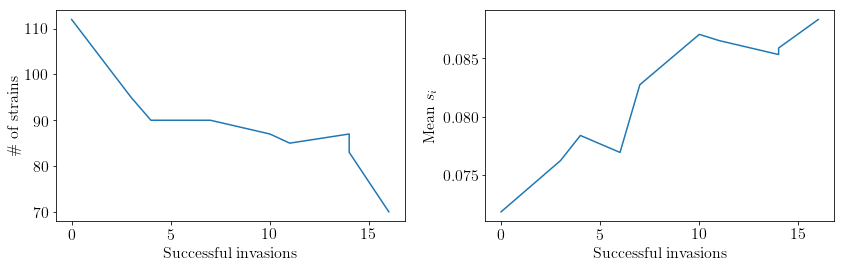

In [62]:
# Number of strains vs successful invasions.
invasion_per_epoch = [np.sum(invasion_bool) for invasion_bool in data['invasion_success_list']]
invasion_cumsum = np.cumsum(invasion_per_epoch)
surv_num = [np.sum(surv_bool) for surv_bool in data['surviving_bool_list']]
s_mean = data['S_mean_ave_list']

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(invasion_cumsum,surv_num)
plt.xlabel('Successful invasions')
plt.ylabel(r'\# of strains')

plt.subplot(1,2,2)
plt.plot(invasion_cumsum,s_mean)
plt.xlabel('Successful invasions')
plt.ylabel(r'Mean $s_i$')

plt.tight_layout()